In [4]:
import pandas as pd

# Load the data from the file into a DataFrame
file_path = 'data/20240102180106.txt'
df = pd.read_csv(file_path, sep='\t')  # Assuming the separator is a tab, as common in such data logs

In [16]:
data = df[['加速度X(g)', '加速度Y(g)', '加速度Z(g)', '时间']]

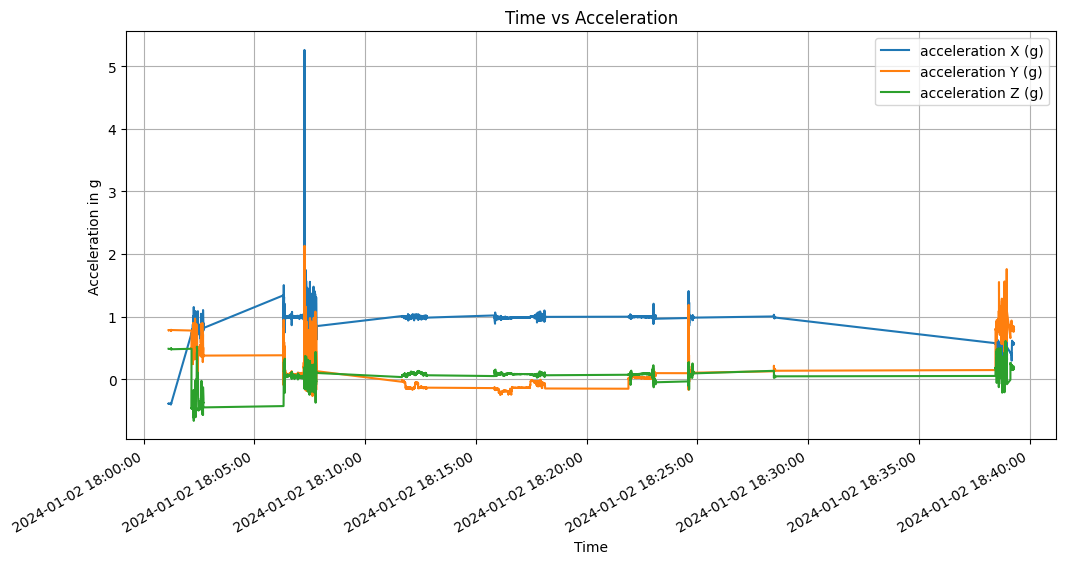

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Adjusting the datetime parsing to accommodate the specific format of the timestamps
# The format seems to be 'year-month-day hour:minute:second:millisecond'
df['时间'] = pd.to_datetime(df['时间'], format='%Y-%m-%d %H:%M:%S:%f')

# Re-plotting
plt.figure(figsize=(12, 6))

# Plotting each acceleration component
plt.plot(df['时间'], df['加速度X(g)'], label='acceleration X (g)')
plt.plot(df['时间'], df['加速度Y(g)'], label='acceleration Y (g)')
plt.plot(df['时间'], df['加速度Z(g)'], label='acceleration Z (g)')

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Acceleration in g')
plt.title('Time vs Acceleration')
plt.legend()
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate() # Auto format for better date representation
myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.gca().xaxis.set_major_formatter(myFmt)

# Show the plot
plt.show()



### K-means

In [18]:
import pandas as pd
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler

# 假设 df 是包含您数据的 pandas DataFrame
# 加载数据


# 选择加速度数据
acceleration_data = data[['加速度X(g)', '加速度Y(g)', '加速度Z(g)']]

# 数据预处理：标准化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(acceleration_data)

# 时间序列数据通常需要特定的预处理
# 这里我们使用 TimeSeriesScalerMeanVariance 将时间序列标准化为平均值为0，方差为1
scaled_data = TimeSeriesScalerMeanVariance().fit_transform(scaled_data.reshape(scaled_data.shape[0], scaled_data.shape[1], 1))

# 使用 K-均值聚类
n_clusters = 3  # 假设我们希望将数据分成3类
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=10)

# 训练模型
model.fit(scaled_data)

# 预测聚类标签
labels = model.predict(scaled_data)

# 将聚类结果添加到原始 DataFrame
data['Cluster'] = labels

# 现在 df 包含了每个时间点数据的聚类标签


/tmp/ipykernel_1019/2731827514.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels


In [20]:
data.head(100)

,加速度X(g),加速度Y(g),加速度Z(g),时间,Cluster
0,-0.388,0.784,0.486,2024-01-02 18:01:07.170,0
1,-0.388,0.783,0.485,2024-01-02 18:01:07.138,0
2,-0.388,0.784,0.486,2024-01-02 18:01:07.225,0
3,-0.388,0.784,0.486,2024-01-02 18:01:07.343,0
4,-0.387,0.783,0.486,2024-01-02 18:01:07.435,0
...,...,...,...,...,...
95,0.771,0.514,-0.435,2024-01-02 18:02:11.680,2
96,0.761,0.512,-0.424,2024-01-02 18:02:11.184,2
97,0.775,0.489,-0.418,2024-01-02 18:02:11.278,2
98,0.785,0.470,-0.391,2024-01-02 18:02:11.395,2


In [21]:
data.to_csv('data/20240102180106_clustered.txt', sep='\t', index=False)